In [11]:
import pandas as pd
import geopandas as gpd
import folium


In [2]:
df = pd.read_csv("/Users/g48591054/Desktop/week8/data/detailed_ev_charging_stations.csv")
df.head()

Station ID   Latitude   Longitude                                Address  \
0   EVS00001 -33.400998   77.974972       4826 Random Rd, City 98, Country   
1   EVS00002  37.861857 -122.490299  8970 San Francisco Ave, San Francisco   
2   EVS00003  13.776092  100.412776              5974 Bangkok Ave, Bangkok   
3   EVS00004  43.628250  -79.468935              6995 Toronto Ave, Toronto   
4   EVS00005  19.119865   72.913368                5704 Mumbai Ave, Mumbai   

      Charger Type  Cost (USD/kWh) Availability  Distance to City (km)  \
0       AC Level 2            0.27   9:00-18:00                   4.95   
1  DC Fast Charger            0.19         24/7                   4.96   
2       AC Level 2            0.48   6:00-22:00                   8.54   
3       AC Level 1            0.41   9:00-18:00                  13.28   
4       AC Level 2            0.11   9:00-18:00                   9.76   

   Usage Stats (avg users/day) Station Operator  Charging Capacity (kW)  \
0                           35             EVgo                     350   
1                           83             EVgo                     350   
2                           24      ChargePoint                      50   
3                           70        Greenlots                     350   
4                           19             EVgo                     350   

  Connector Types  Installation Year Renewable Energy Source  \
0    CCS, CHAdeMO               2013                     Yes   
1   Tesla, Type 2               2010                     Yes   
2     Type 2, CCS               2019                      No   
3          Type 2               2010                     Yes   
4             CCS               2015                     Yes   

   Reviews (Rating)  Parking Spots Maintenance Frequency  
0               4.0              7              Annually  
1               3.9              2               Monthly  
2               3.6              9              Annually  
3               4.2              7               Monthly  
4               3.7              6              Annually

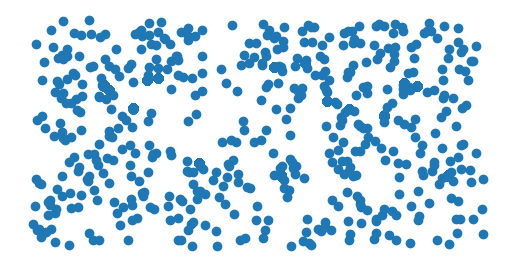

In [3]:
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf = gdf.set_crs("EPSG:4326")

ax = gdf.plot()
ax.set_axis_off()

In [4]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
from folium import plugins

map = folium.Map(location=(38.90003175872419, -77.0486635749773), zoom_start=15)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]

heat_data
# plugins.HeatMap(heat_data).add_to(map)

# map

[[-33.400998, 77.974972],
 [37.861857, -122.490299],
 [13.776092, 100.412776],
 [43.62825, -79.468935],
 [19.119865, 72.913368],
 [-23.695008, -46.548187],
 [55.762409, 37.65583],
 [13.715561, 100.561468],
 [41.807653, -87.755349],
 [39.968701, 116.433865],
 [19.944111, 26.228083],
 [55.81937, 37.543245],
 [52.506967, 13.345088],
 [41.847035, -87.670005],
 [25.392096, 55.28618],
 [25.335831, 55.227629],
 [13.877602, 100.508728],
 [37.790361, -122.378324],
 [37.695636, 127.050246],
 [19.519719, -99.171733],
 [81.568159, -92.791385],
 [55.738402, 37.675763],
 [-33.826489, 18.54196],
 [52.43128, 13.407406],
 [41.989867, -87.637143],
 [39.908197, 116.390126],
 [13.743441, 100.449744],
 [-23.654772, -46.534003],
 [-33.718044, 151.217306],
 [39.807514, 116.203733],
 [53.03844, 17.213144],
 [39.999797, 116.345712],
 [-23.619267, -46.67757],
 [39.843388, 116.357078],
 [41.868532, -87.602875],
 [43.634205, -79.494221],
 [13.756978, 100.402198],
 [-33.759342, 151.210366],
 [39.941888, 116.320916

In [6]:
gdf.explore()

In [12]:
tesla = pd.read_csv("/Users/g48591054/Desktop/week8/data/alt_fuel_stations_10_2015.csv")
tesla.head()

Fuel Type Code                                       Station Name  \
0           ELEC        BVD Petroleum - Comber - Tesla Supercharger   
1           ELEC               Ramada Cornwall - Tesla Supercharger   
2           ELEC       Port Hope Travel Center - Tesla Supercharger   
3           ELEC  Les Promenades Drummondville - Tesla Supercharger   
4           ELEC    Canmore Rocky Mountain Inn - Tesla Supercharger   

            Street Address  Intersection Directions           City State  \
0    7018 Industrial Drive                      NaN         Comber    ON   
1     805 Brookdale Avenue                      NaN       Cornwall    ON   
2       6498 Telephone Rd.                      NaN      Port Hope    ON   
3  755 boul. Rene-Levesque                      NaN  Drummondville    QC   
4    1719 Bow Valley Trail                      NaN        Canmore    AB   

       ZIP  Plus4 Station Phone Status Code  ...  RD Blends  \
0  N0P 1J0    NaN  877-798-3752           E  ...        NaN   
1  K6J 4P3    NaN  877-798-3752           E  ...        NaN   
2   L1A3V6    NaN  877-798-3752           E  ...        NaN   
3  J2C 6Y7    NaN  877-798-3752           E  ...        NaN   
4  T1W 1L7    NaN  877-798-3752           E  ...        NaN   

  RD Blends (French) RD Blended with Biodiesel RD Maximum Biodiesel Level  \
0                NaN                       NaN                        NaN   
1                NaN                       NaN                        NaN   
2                NaN                       NaN                        NaN   
3                NaN                       NaN                        NaN   
4                NaN                       NaN                        NaN   

   NPS Unit Name  CNG Station Sells Renewable Natural Gas  \
0            NaN                                      NaN   
1            NaN                                      NaN   
2            NaN                                      NaN   
3            NaN                                      NaN   
4            NaN                                      NaN   

   LNG Station Sells Renewable Natural Gas  Maximum Vehicle Class  \
0                                      NaN                    NaN   
1                                      NaN                    NaN   
2                                      NaN                    NaN   
3                                      NaN                    NaN   
4                                      NaN                    NaN   

   EV Workplace Charging  Funding Sources  
0                  False              NaN  
1                  False              NaN  
2                  False              NaN  
3                  False              NaN  
4                  False              NaN  

[5 rows x 75 columns]

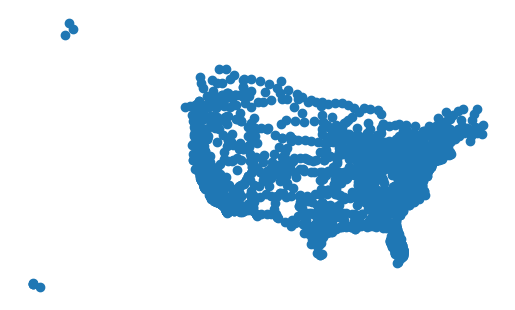

In [8]:
tesla_geo = gpd.points_from_xy(tesla['Longitude'], tesla['Latitude'])
gdf = gpd.GeoDataFrame(tesla, geometry=tesla_geo)
gdf = gdf.set_crs("EPSG:4326")

ax = gdf.plot()
ax.set_axis_off()

In [13]:
m = gdf.explore()

In [10]:
from folium import plugins

map = folium.Map(location=(38.90003175872419, -77.0486635749773), zoom_start=5)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map